In [54]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
import numpy as np
# import pandas_datareader as datareader
import matplotlib.pyplot as plt
import datetime
#from matplotlib.finance import candlestick_ohlc
# from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
pd.options.mode.chained_assignment = None  # default='warn'



In [57]:
bayer_data= pd.read_csv('SlimmedBAYZF.csv')
honeywell_data= pd.read_csv('SlimmedHON.csv')
mmm_data= pd.read_csv('SlimmedMMM.csv')
synfin_data= pd.read_csv('SlimmedSYF.csv')


#listed alphabetically, we'll keep this order consistent
all_data = [bayer_data,honeywell_data,mmm_data,synfin_data]

labels = ['Bayer', 'Honeywell', '3M', 'Synchrony Financial']

# clear all na vals
## youll find there are row comprised of all NaN values 
###specifically rows 2516 to 2540
# for data in all_data:
#     df1=data[mmm_data.isnull().any(axis=1)]
#     print(df1.index)
    
#for i,data in enumerate(all_data):
#    print(data.head())
#    all_data[i]=data.dropna(axis=0)
    
#for data in all_data:
#    df1=data[mmm_data.isnull().any(axis=1)]
#    #print(df1.index)



In [ ]:
# Converting date to pandas datetime format
# %matplotlib inline

# def candlestick_chart(df):
#     df=all_data[1]
#     df['Date'] = pd.to_datetime(df['Date'])
#     df["Date"] = df["Date"].apply(mdates.date2num)

#     # Creating required data in new DataFrame OHLC
#     ohlc= df[['Date', 'Open', 'High', 'Low','Close']]
#     # In case you want to check for shorter timespan
#     # ohlc =ohlc.tail(60)

#     f1, ax = plt.subplots(figsize = (10,5))

#     # plot the candlesticks
#     candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# for i,data in enumerate(all_data):
#     candlestick_chart(data)
#     plt.xlabel('Date')  
#     plt.ylabel('Close Price')  
#     plt.title(labels[i]) 
#     plt.show()

In [ ]:
#for i,data in enumerate(all_data):
#    df=data

#    df['Date'] = pd.to_datetime(df['Date'])

    # Using matplotlib to add required columns
 #   plt.plot(df['Date'], df['Close'])

    # Adding labels
#    plt.xlabel('Date')  
 #   plt.ylabel('Close Price')  
   # plt.title(labels[i]) 
  #  plt.savefig(labels[i]+'.png')
  #  plt.show()



Index(['Date', 'Close'], dtype='object')
-0.3388579537247395 0.4764404193667787


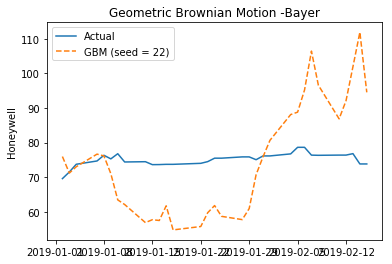

Index(['Date', 'Close'], dtype='object')
0.4531918539590675 0.30671212216302174


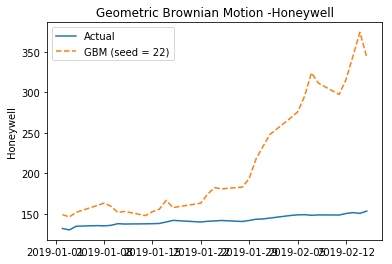

Index(['Date', 'Close'], dtype='object')
0.306470821356407 0.3175228171142741


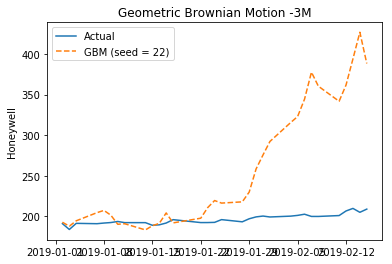

Index(['Date', 'Close'], dtype='object')
-0.3247182141306616 0.4101624245845022


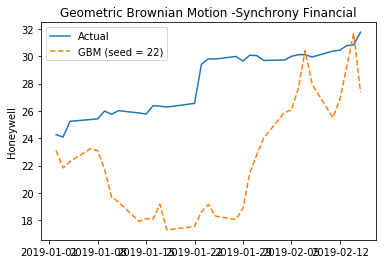

In [60]:
# GBM Exact Solution

# Parameters
#
# So:     initial stock price
# mu:     returns (drift coefficient)
# sigma:  volatility (diffusion coefficient)
# W:      brownian motion
# T:      time period
# N:      number of increments


#using GBM

    
def daily_return(close):
    returns = []
#    for i in range(0, len(close)-1):
    for i in range(close.index[0],close.index[-1]):
        today = close[i+1]
        yesterday = close[i]
        daily_return = (today - yesterday)/yesterday
        returns.append(daily_return)
    return returns



def Brownian(seed, N):
    
    np.random.seed(seed)                         
    dt = 1/N                                    # time step
    b = np.random.normal(0., 1, int(N))*np.sqrt(dt)  # brownian increments
    W = np.cumsum(b)                             # brownian path
    return W, b



def GBM(So, mu, sigma, W, T, N):    
    t = np.linspace(0,1,N+1)
    S = [So]
    for i in range(1,int(N+1)):
        drift = (mu - 0.5 * sigma**2) * t[i]
        diffusion = sigma * W[i-1]
        S_temp = So*np.exp(drift + diffusion)
        S.append(S_temp)
    return S, t

#testing 

mmm_test = pd.read_csv("Data/3m_stock_prices.csv")
bayer_test = pd.read_csv("Data/bayer_stock_prices.csv")
honeywell_test = pd.read_csv("Data/honeywell_stock_prices.csv")
synfin_test = pd.read_csv("Data/synchrony_stock_prices.csv")

all_test = [bayer_test,honeywell_test,mmm_test,synfin_test]




submission = pd.DataFrame({
        "Date": mmm_test['Date'] })




for i,data in enumerate(all_data):
    # last days we will look at to calculate the drift and diffusion
    time_period = 250
    df=all_data[i]
    df=all_data[i].loc[len(df)-(time_period):]
    df=df.set_index(np.arange(len(df)))
    print(df.columns)
    close = df['Close']
    time = np.linspace(1, len(close), len(close))
    ##we need some incremental returns report to get our drift and diffusion coefficient
    returns = daily_return(close)
    mu = np.mean(returns)*len(df)
    sigma = np.std(returns)*np.sqrt(len(df))
    print(mu,sigma)
    seed = 22
    So = close[len(close)-1]      
    N = len(df)
    ind=(np.linspace(1,len(df),32))
    ind=[round(i) for i in ind]
    W = Brownian(seed, N)[0]
    T = 1
    soln = GBM(So, mu, sigma, W, T, N)[0]
    ind_soln=[soln[int(i)] for i in ind]
    submission[labels[i]] = ind_soln
#     plt.plot(pd.to_datetime(submission['Date']),ind_soln)
#     plt.show()
    
    test=(all_test[i])

    time = np.linspace(1, len(test), len(test))
    date = pd.to_datetime(test['Date'])

    plt.plot(date, all_test[i]['Close'], label = 'Actual')
    plt.plot(date, ind_soln, label = 'GBM (seed = 22)', ls='--')

    plt.ylabel(labels[1])
    plt.title('Geometric Brownian Motion -'+labels[i])

    plt.legend(loc = 'upper left')
    plt.show()

submission.to_csv('submission.csv',index=False)



In [ ]:
#attmpeting Monte Carlo simulations on GBM



In [ ]:
#guiding the GBM model using sentiment analysis



In [61]:
predicted_prices = pd.read_csv('submission.csv')
bayer_data= pd.read_csv('SlimmedBAYZF.csv')
bayer_stuff= pd.read_csv('bayer_stock_prices.csv')

predictedBayer = predicted_prices['Bayer'].tolist()
actualBayer = bayer_stuff['Close'].tolist()
print("Bayer RMSE: " + str(sqrt(mean_squared_error(actualBayer, predictedBayer))))

mmm_stuff= pd.read_csv('3m_stock_prices.csv')

predictedMMM = predicted_prices['3M'].tolist()
actualMMM = bayer_stuff['Close'].tolist()
print("3M RMSE: " + str(sqrt(mean_squared_error(actualMMM, predictedMMM))))


honeywell_stuff= pd.read_csv('honeywell_stock_prices.csv')

predictedHoney = predicted_prices['Honeywell'].tolist()
actualHoney = bayer_stuff['Close'].tolist()
print("Honeywell RMSE: " + str(sqrt(mean_squared_error(actualHoney, predictedHoney))))

predicted_prices = pd.read_csv('submission.csv')
bayer_data= pd.read_csv('SlimmedBAYZF.csv')
bayer_stuff= pd.read_csv('bayer_stock_prices.csv')

predictedSynch = predicted_prices['Synchrony Financial'].tolist()
actualSynch = bayer_stuff['Close'].tolist()
print("Synchrony Financial RMSE: " + str(sqrt(mean_squared_error(actualSynch, predictedSynch))))





Bayer RMSE: 15.836115224147443
3M RMSE: 198.63064761323966
Honeywell RMSE: 158.73191507396433
Synchrony Financial RMSE: 52.70865206582672
